In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
itineraries_google = pd.read_pickle("../../data/mobfw_new_rpc/car_isere.google")
itineraries_graphh = pd.read_pickle("../../data/mobfw_new_rpc/car_isere.pkl")

needs = pd.read_pickle("../../data/mobfw_new_rpc/rpc_isere.pkl")
needs["start_dayofweek"] = needs["start_datetime"].dt.dayofweek
needs["start_time"] = needs["start_datetime"].dt.time

itineraries_google.rename(columns={"distance_car": "distance_google", "time_car": "time_google"}, inplace=True)
itineraries_graphh.rename(columns={"distance_car": "distance_graphh", "time_car": "time_graphh"}, inplace=True)

needs = pd.merge(needs, itineraries_google, left_on=['start_lon', 'start_lat', 'end_lon', 'end_lat', 'start_dayofweek', 'start_time'], right_index=True, how="left")
needs = pd.merge(needs, itineraries_graphh, left_on=['start_lon', 'start_lat', 'end_lon', 'end_lat'], right_index=True, how="left")

<AxesSubplot:ylabel='Frequency'>

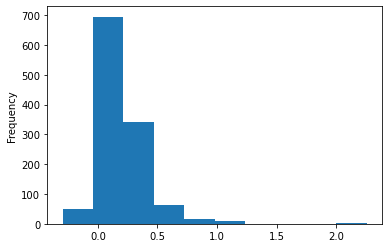

In [3]:
((needs["time_google"] - needs["time_graphh"]) / needs["time_graphh"]).plot(kind="hist")

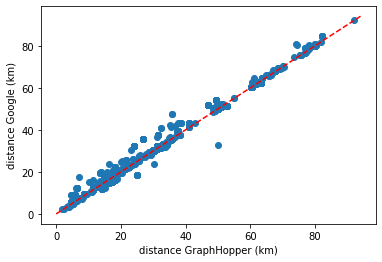

In [4]:
plt.scatter(needs["distance_graphh"] / 1000, needs["distance_google"] / 1000)
plt.plot(range(95), "--", color="r")
plt.xlabel("distance GraphHopper (km)")
plt.ylabel("distance Google (km)");

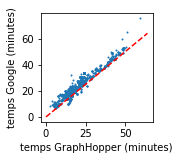

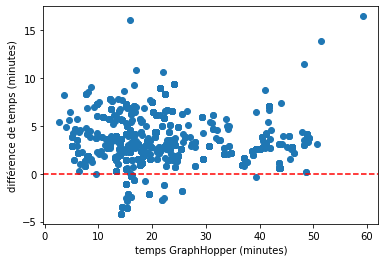

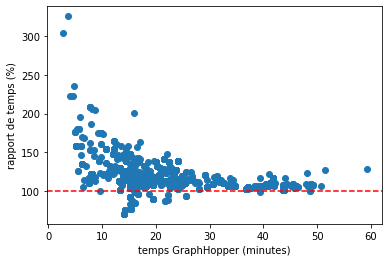

In [10]:
time_graphh = needs["time_graphh"].dt.total_seconds() / 60
time_google = needs["time_google"].dt.total_seconds() / 60
plt.figure(figsize=(2,2))
plt.scatter(time_graphh, time_google, s=1)
plt.plot(range(65), "--", color="r")
plt.xlabel("temps GraphHopper (minutes)")
plt.ylabel("temps Google (minutes)")
plt.savefig('../../redactions/analyse_rpc/figures/diff_google_gh.pgf', bbox_inches='tight')

plt.figure()
plt.scatter(time_graphh, time_google - time_graphh)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("temps GraphHopper (minutes)")
plt.ylabel("différence de temps (minutes)")

plt.figure()
plt.scatter(time_graphh, time_google /time_graphh*100)
plt.axhline(y=100, color='r', linestyle='--')
plt.xlabel("temps GraphHopper (minutes)")
plt.ylabel("rapport de temps (%)");

In [ ]:
(needs["distance_google"].sum() - needs["distance_graphh"].sum()) / needs["distance_graphh"].sum()

In [ ]:
(needs["time_google"].sum() - needs["time_graphh"].sum()) / needs["time_graphh"].sum()

In [ ]:
needs.loc[4810858]